In [50]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv
from rdkit import RDLogger
from win32cryptcon import szOID_NETSCAPE_CERT_SEQUENCE

RDLogger.DisableLog('rdApp.*')
from sklearn import preprocessing
from sklearn import decomposition
import seaborn as sns
import umap
import random
from rdkit import DataStructs

In [2]:
with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [(Chem.MolFromSmiles(m['Smiles']), float(m["pChEMBL Value"]) if m["pChEMBL Value"] else 0.0) for m in reader]

In [3]:
len(mtor_ligands)

4596

In [5]:
from rdkit.Chem import rdMolDescriptors

In [8]:
mqns = [rdMolDescriptors.MQNs_(mol) for mol, act in mtor_ligands]

In [20]:
norm_mqn = preprocessing.normalize(mqns, axis=0)

In [25]:
pca = decomposition.PCA(n_components=42)
pca_mqns = pca.fit_transform(norm_mqn)

In [26]:
pca_mqns

array([[ 8.57705602e-03,  1.84480978e-02, -2.56013555e-02, ...,
         4.47316942e-15, -4.11230557e-22, -2.84705073e-16],
       [-6.50943827e-03,  1.48971127e-03, -4.62621708e-04, ...,
         3.49565274e-15, -1.63560872e-22, -2.07626564e-16],
       [-3.22125594e-03,  3.11252844e-03, -2.90766196e-03, ...,
         3.51646943e-15, -2.58983150e-22, -1.98007552e-16],
       ...,
       [ 5.91792281e-03, -6.88056301e-03,  1.00759297e-02, ...,
         5.04938072e-15, -1.14810295e-21, -2.80508637e-16],
       [-9.07421759e-03, -5.90737590e-03,  7.19548323e-03, ...,
        -3.26888613e-16, -1.80489077e-22, -5.04950443e-18],
       [-2.76829364e-02,  8.93042646e-03, -1.73839117e-02, ...,
        -2.33652409e-14,  1.59118428e-21,  7.14767305e-16]])

<Axes: >

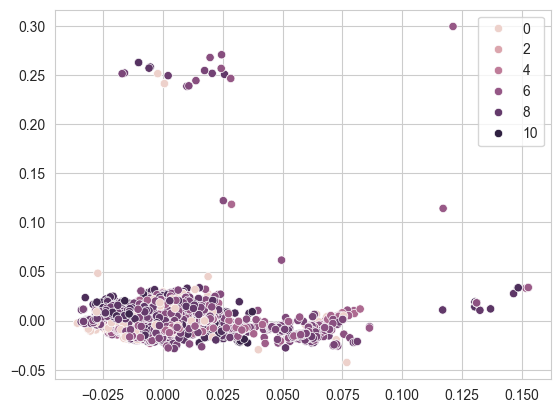

In [31]:
sns.scatterplot(x=[p[0] for p in pca_mqns], y=[p[1] for p in pca_mqns], hue=[ac for mol, ac in mtor_ligands])

In [32]:
fpgen = Chem.GetMorganGenerator(radius=2)

In [33]:
fps = [fpgen.GetFingerprint(mol) for mol, act in mtor_ligands]

In [35]:
fps[0]

In [45]:
random.seed(1111)
fit = umap.UMAP()
u = fit.fit_transform(fps)

C:\Users\milan\workspace\cdd2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [39]:
u

array([[  2.4164898,   1.2957292],
       [  2.588717 ,   1.4799323],
       [  2.5853806,   1.4743227],
       ...,
       [  2.3720753,   4.7097907],
       [-13.34281  ,   3.5534391],
       [  6.661654 ,   1.463824 ]], dtype=float32)

<Axes: >

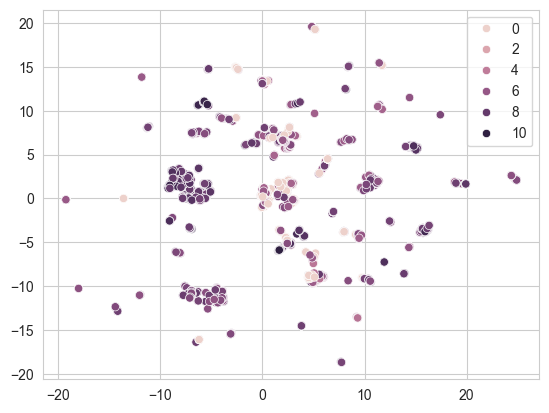

In [49]:
sns.scatterplot(x=[p[0] for p in u], y=[p[1] for p in u], hue=[ac for mol, ac in mtor_ligands])

In [46]:
random.seed(1111)
fit = umap.UMAP()
u2 = fit.fit_transform(fps)

C:\Users\milan\workspace\cdd2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

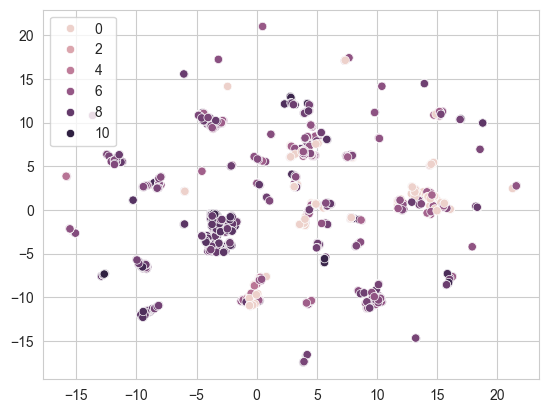

In [48]:
sns.scatterplot(x=[p[0] for p in u2], y=[p[1] for p in u2], hue=[ac for mol, ac in mtor_ligands])

In [51]:
def distance_function(index1, index2, *args, fingerprints=fps,
                      metric=DataStructs.TanimotoSimilarity):
    return 1 - DataStructs.FingerprintSimilarity(fingerprints[index1],
                                                 fingerprints[index2],
                                                 metric=metric)

In [52]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
picker = MaxMinPicker()

In [58]:
picked_1 = list(picker.LazyPick(distance_function, len(mtor_ligands), pickSize=50))

In [59]:
picked_2 = list(picker.LazyBitVectorPick(fps, len(mtor_ligands), pickSize=50))

In [65]:
picked_1

[1668,
 631,
 99,
 3479,
 253,
 1134,
 406,
 1583,
 1191,
 2158,
 485,
 1057,
 1121,
 1219,
 1215,
 4059,
 4013,
 4104,
 4280,
 1159,
 3870,
 4003,
 17,
 1218,
 1553,
 2907,
 2807,
 2595,
 1367,
 2597,
 1095,
 475,
 4509,
 2009,
 2783,
 467,
 4577,
 2372,
 3917,
 2165,
 1933,
 1738,
 3082,
 1112,
 775,
 1796,
 1141,
 4185,
 273,
 3478]

In [61]:
p1 = [idx in picked_1 for idx, m in enumerate(mtor_ligands)]
p2 = [idx in picked_2 for idx, m in enumerate(mtor_ligands)]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

<Axes: >

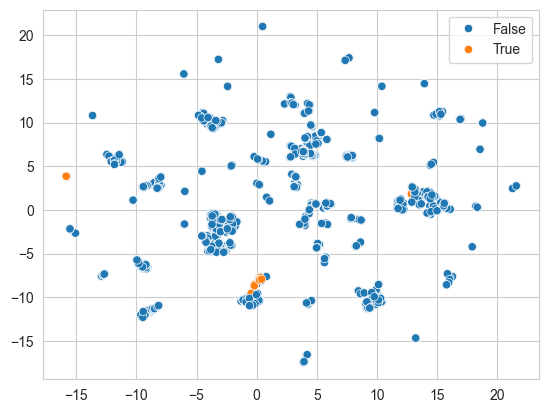

In [63]:
sns.scatterplot(x=[p[0] for p in u2], y=[p[1] for p in u2], hue=p1)

<Axes: >

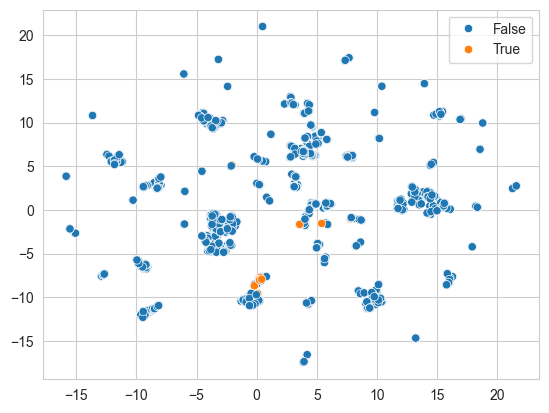

In [64]:
sns.scatterplot(x=[p[0] for p in u2], y=[p[1] for p in u2], hue=p2)